# Import libs

In [48]:
import torch
from torch import nn, optim

import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

# Preparing the Training Data

In [49]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

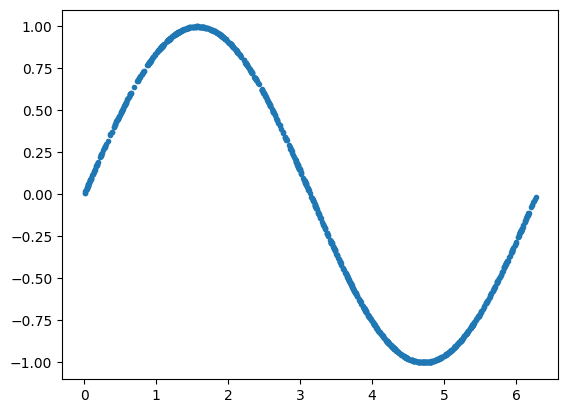

In [50]:
plt.plot(train_data[:, 0], train_data[:, 1], '.')

# Create data loader

In [51]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

 # Implementing the Discriminator

In [52]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.model(x)
        return output
    
discriminator = Discriminator()

# Implementing the Generator    

In [53]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )
        
    def forward(self, x):
        output = self.model(x)
        return output
    
generator = Generator()

# Training the Models

In [54]:
# Define some variable
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [55]:
# Define optimizer for training model
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [56]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))
        
        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()
        
        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch}, Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch}, Loss G.: {loss_generator}")
        

Epoch: 0, Loss D.: 0.21308742463588715
Epoch: 0, Loss G.: 1.7989581823349
Epoch: 10, Loss D.: 0.6099680662155151
Epoch: 10, Loss G.: 0.9077385067939758
Epoch: 20, Loss D.: 0.620063066482544
Epoch: 20, Loss G.: 0.9532092809677124
Epoch: 30, Loss D.: 0.6283488273620605
Epoch: 30, Loss G.: 0.9910141229629517
Epoch: 40, Loss D.: 0.6770229935646057
Epoch: 40, Loss G.: 0.6435416340827942
Epoch: 50, Loss D.: 0.6597822308540344
Epoch: 50, Loss G.: 0.8030276894569397
Epoch: 60, Loss D.: 0.7011778354644775
Epoch: 60, Loss G.: 0.6873208284378052
Epoch: 70, Loss D.: 0.6248222589492798
Epoch: 70, Loss G.: 0.8231405019760132
Epoch: 80, Loss D.: 0.6872455477714539
Epoch: 80, Loss G.: 0.8475332260131836
Epoch: 90, Loss D.: 0.6637624502182007
Epoch: 90, Loss G.: 0.6601176857948303
Epoch: 100, Loss D.: 0.6075984835624695
Epoch: 100, Loss G.: 0.7509164810180664
Epoch: 110, Loss D.: 0.6317901015281677
Epoch: 110, Loss G.: 0.9446561336517334
Epoch: 120, Loss D.: 0.6777792572975159
Epoch: 120, Loss G.: 0.75

# Checking the samples Generated by the GAN

In [67]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

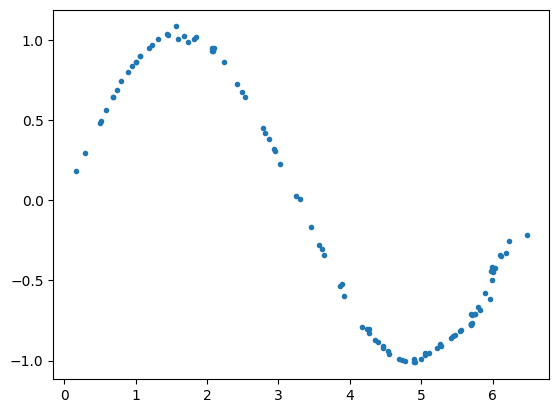

In [68]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], '.')